In [16]:
import gaps_online.tof as gt
import gaps_online as go
import gaps_tof as gt_cxx
import gaps_online.db as db
import rust_dataclasses as rd
import re
from tqdm.notebook import tqdm
from glob import glob
from pathlib import Path
#import HErmes.fitting as fit

import dashi as d
import pylab as p
import numpy as np
d.visual()
import charmingbeauty.visual as vis
import charmingbeauty.layout as lo
vis.set_style_present()

# FIXME add DJANGO_ALLOW_ASYNC_UNSAFE=1 to setup.env
RUNPATH  = Path('/data1/nextcloud/cra_data/data/2023_nevis/tof/')
CALIPATH = RUNPATH / 'calibration' / '2024_03_12'

In [17]:
print (CALIPATH)

/data1/nextcloud/cra_data/data/2023_nevis/tof/calibration/2024_03_12


In [24]:
def skipped_events(events):
    n_skipped = 0
    last_evid = 0
    #print(len(events))
    evids = [k.mt_event.event_id for k in events]
    #print (min(evids))
    #print (max(evids))
    evids = [k for k in sorted(set(evids))]
    #print (len(evids))
    if evids[0] == 0:
        evids = evids[1:]
    last_evid = evids[0]
    #print (last_evid)
    #print (len(evids))
    #print (evids[:10])
    #raise
    for k in range(len(evids)):#, desc="Missing event search..."):
        if not last_evid in evids:
            n_skipped += 1
        last_evid += 1
        
    #for ev in events:
        #if ev.event_id != last_evid + 1:
        #if ev.header.event_id != last_evid + 1:
        #    if not last_evid == 0:
         #       n_skipped += 1
        #last_evid = ev.header.event_id
        #last_evid = ev.event_id
        #print (ev.event_id)
    return n_skipped

In [25]:
runfiles = sorted((RUNPATH / '142').glob('*.tof.gaps'))
#runfiles = [k for k in runfiles][10:]
#print (runfiles)
#print (len(runfiles))
#raise
nfiles = 0
events = []
all_skipped = 0
last_evid   = 0
for rfile in tqdm(runfiles):
    #packets = gt.get_tofpackets(str(rfile), filter=go.cxx_api.PacketType.TofEventSummary)
    packets = gt.get_tofpackets(str(rfile), filter=go.cxx_api.PacketType.TofEvent)
    #print (packets)
    
    #raise
    #print (packets[1].payload)
    events = [go.cxx_api.TofEvent.from_tofpacket(k) for k in packets]
    #for k in events:
    #    print(k.header.event_id)
    #raise
    #print (events[0])
    #raise
    #events = [go.cxx_api.TofEventSummary.from_bytestream(k.payload, 0) for k in packets]
    #events = sorted(events, key = lambda x : x.header.event_id)
    #if not events:
    #    print (f"File {rfile} dos not contain any tof events!")
     #   continue
    #last_event = events[-1].header.event_id
    #last_event = events[-1].event_id
    #raise
    #if not last_evid == 0:
    #    if last_event - last_evid > 1:
    #        pass
            #print(f"We skipped {last_event-last_evid} events between the files!!!")
            #all_skipped += last_event - last_evid - 1
    #last_evid = last_event
    #n_skip = skipped_events(events[10000:20000])
    n_skip = skipped_events(events)
    #raise
    all_skipped += n_skip
    print (f'File {rfile} had {n_skip}/{len(events)} {100*n_skip/len(events):4.2f} % skipped event ids!')
    #break
    #events.extend([go.cxx_api.TofEvent.from_tofpacket(k) for k in packets])
    #nfiles += 1
    #if nfiles == 20:
    #    break

  0%|          | 0/45 [00:00<?, ?it/s]

File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_107.2024_04_06-16_11_19.tof.gaps had 0/48924 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_112.2024_04_06-16_22_42.tof.gaps had 0/49121 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_113.2024_04_06-16_24_46.tof.gaps had 0/49103 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_117.2024_04_06-16_33_53.tof.gaps had 0/49127 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_118.2024_04_06-16_35_58.tof.gaps had 2/49133 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_131.2024_04_06-17_05_02.tof.gaps had 0/49110 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_140.2024_04_06-17_24_45.tof.gaps had 0/48931 0.00 % skipped event ids!
File /data1/nextcloud/cra_data/data/2023_nevis/tof/142/Run142_151.202

In [5]:
print (len(events))
print (all_skipped)
#go.cxx_api.PacketType.

42636
7454


In [8]:
events[0].mt_event

<MasterTriggerEvent : [N LTBS 25]
  event_id      : 68177421
  timestamp     : 821114582
  tiu_timestamp : 772828425
  tiu_gps_32    : 726029
  tiu_gps_16    : 0
  n_paddles     : 2
  crc           : 0
  broken        : 1
  valid         : 0
 == == LTB HITS DSI/J/CH => [RB_ID CH] == ==
	 DSI/J 1/2 15 => ?
	 DSI/J 4/1 15 => ?
>

In [5]:
hits = []
for k in tqdm(events):
    for n in k.rbevents:
        hits.extend(n.hits)

  0%|          | 0/25229 [00:00<?, ?it/s]

In [6]:
print (len(hits))

69149


No calibration given! Will plot adc values!


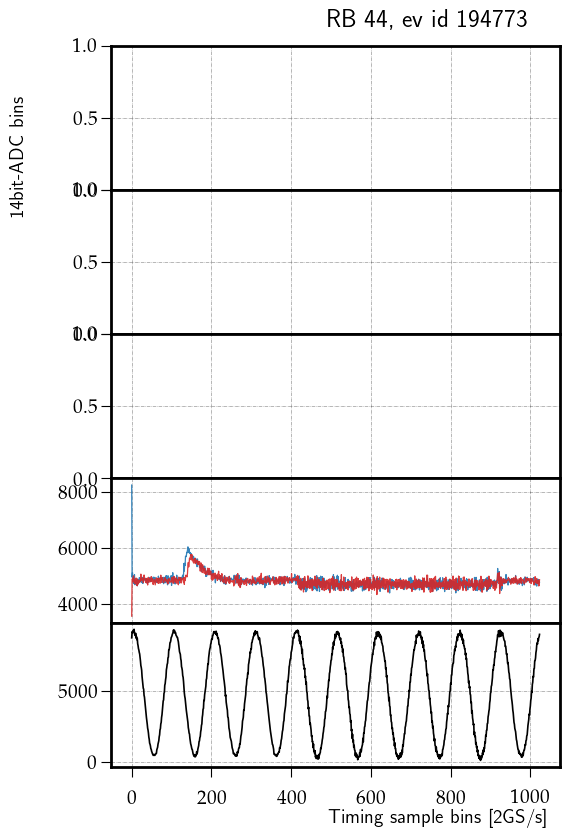

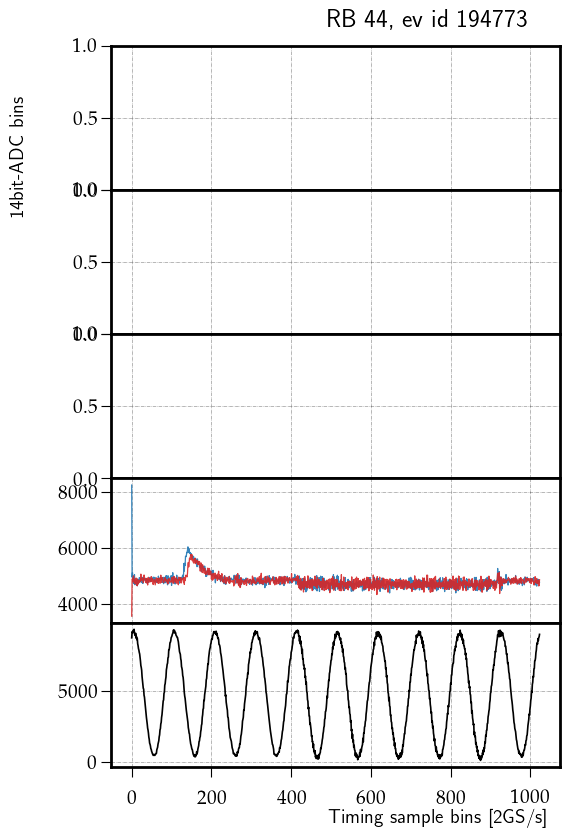

In [16]:
%matplotlib inline
events[0].rbevents[0].plot()

In [15]:
%matplotlib inline

h = hits[0]
#print (h)
for h in hits:
    if h.charge_b != 0:
        print (h.charge_b)
        print (h)
        break

-50.0
<TofHit
  paddle ID         : 8
  timestamp32       : 0
  timestamp16       : 0
   |-> timestamp48  : 0.000000
  _________
  ##  Peak:
  >>  time   A | B  : 0.000000 0.000000
  >>  height A | B  : 0.000000 0.000000
  >>  charge A | B  : -50.000000 0.000000
  >>  charge min_I  : -10.000000
  >>  in pad. pos   : -163.800003
  >>  t_avg         : 0.000000
  cntr ETX          : 0
  broken (?depr)    : 0>


<TofHit
  paddle ID         : 8
  timestamp32       : 0
  timestamp16       : 0
   |-> timestamp48  : 0.000000
  _________
  ##  Peak:
  >>  time   A | B  : 0.000000 0.000000
  >>  height A | B  : 0.000000 0.000000
  >>  charge A | B  : -50.000000 0.000000
  >>  charge min_I  : -10.000000
  >>  in pad. pos   : -163.800003
  >>  t_avg         : 0.000000
  cntr ETX          : 0
  broken (?depr)    : 0>


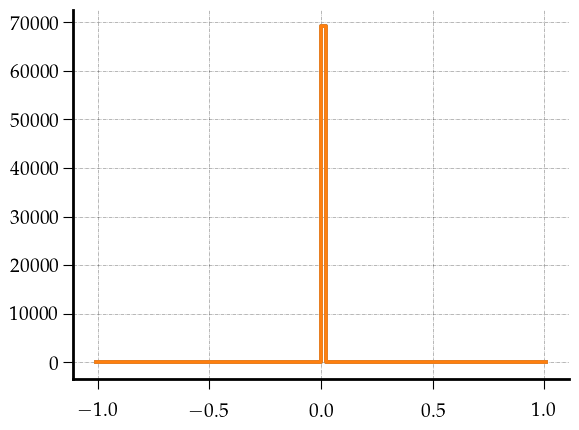

In [ ]:
peaks_a = [h.peak_a for h in hits]
peaks_b = [h.peak_b for h in hits]

hist_a = d.factory.hist1d(peaks_a, 100)
hist_b = d.factory.hist1d(peaks_b, 100)

hist_a.line()
hist_b.line()
p.show()